In [16]:
pip install matplotlib

     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     - -------------------------------------- 0.2/7.6 MB 6.7 MB/s eta 0:00:02
     -- ------------------------------------- 0.5/7.6 MB 5.2 MB/s eta 0:00:02
     ---- ----------------------------------- 0.8/7.6 MB 5.9 MB/s eta 0:00:02
     ------ --------------------------------- 1.3/7.6 MB 6.8 MB/s eta 0:00:01
     -------- ------------------------------- 1.5/7.6 MB 6.5 MB/s eta 0:00:01
     --------- ------------------------------ 1.9/7.6 MB 6.7 MB/s eta 0:00:01
     ------------ --------------------------- 2.4/7.6 MB 7.4 MB/s eta 0:00:01
     -------------- ------------------------- 2.9/7.6 MB 7.6 MB/s eta 0:00:01
     ----------------- ---------------------- 3.3/7.6 MB 7.8 MB/s eta 0:00:01
     ------------------- -------------------- 3.6/7.6 MB 8.0 MB/s eta 0:00:01
     --------------------- ------------------ 4.1/7.6 MB 7.9 MB/s eta 0:00:01
     ------------------------ --------------- 4.6/7.6 MB 8.1 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\Master\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/293.3 kB ? eta -:--:--
     --------------- ---------------------- 122.9/293.3 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\Master\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
import sidetable as stb
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# cargamos el dataframe

df = pd.read_pickle('../datos/clima_2002-2022.pkl')

In [7]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 50

In [8]:
df.head()

,City,Latitude,Longitude,Date,Month,Year,Season,Precipitation_(mm),Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Dew_Point_(°C)_Max,Dew_Point_(°C)_Avg,Dew_Point_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max,Pressure_(hPa)_Avg,Pressure_(hPa)_Min
1,Elche,38.2851,-0.5625,2002-01-01,January,2002,winter,0,13.9,12.7,12.2,12.8,8.5,5.0,94.0,75.9,62.0,37.0,25.1,19.3,1023,1023,1019
2,Elche,38.2851,-0.5625,2002-01-02,January,2002,winter,0,13.9,12.7,10.0,11.1,8.8,7.2,82.0,76.7,67.0,40.2,23.0,4.8,1023,1019,1019
3,Elche,38.2851,-0.5625,2002-01-03,January,2002,winter,0,13.9,11.6,8.9,11.1,8.8,7.2,94.0,83.8,72.0,14.5,5.6,0.0,1019,1016,1013
4,Elche,38.2851,-0.5625,2002-01-04,January,2002,winter,0,15.0,12.5,8.9,11.1,8.7,6.1,94.0,77.6,63.0,29.0,12.9,3.2,1023,1016,1013
5,Elche,38.2851,-0.5625,2002-01-05,January,2002,winter,0,13.9,13.0,12.2,11.1,7.3,5.0,88.0,68.2,58.0,27.4,23.3,9.7,1029,1026,1023


In [9]:
print(f"En el dataframe hay {df.shape[0]} filas y {df.shape[1]} columnas.")
print(".............................................")    
print(f"5 filas aleatorias:")
display(df.sample(5))
print(".............................................")
print(f"Los tipos de data por columna del dataframe son:")
display(df.dtypes.reset_index())
print(".............................................")
print(f"La cantidad de nulos por columna del dataframe son:")
display(df.isnull().sum().reset_index())
print(".............................................")
print(f"El porcentaje de nulos por columna del dataframe son:")
display(df.isnull().sum() * 100 / df.shape[0])
print(".............................................")
if df.duplicated().sum() != 0:
    print(f"En el dataframe hay {df.duplicated().sum()} filas duplicadas.")
else:
    print(f"No hay filas duplicadas.")
print(".............................................")
print(f"Los principales estadísticos de las columnas numéricas son:")
display(df.describe())
print(".............................................")
print(f"Los principales estadísticos de las columnas categóricas son:")
display(df.describe(include=object))
print(".............................................")

En el dataframe hay 30626 filas y 23 columnas.
.............................................
5 filas aleatorias:


,City,Latitude,Longitude,Date,Month,Year,Season,Precipitation_(mm),Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Dew_Point_(°C)_Max,Dew_Point_(°C)_Avg,Dew_Point_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max,Pressure_(hPa)_Avg,Pressure_(hPa)_Min
23,Helsinki,60.3179,24.9496,2020-01-23,January,2020,winter,0,2.8,-0.4,-3.9,0.0,-2.9,-6.1,93.0,84.5,75.0,22.5,15.6,9.7,1013,1006,996
21,Helsinki,60.3179,24.9496,2017-07-21,July,2017,summer,0,18.9,15.1,7.8,11.1,8.9,6.1,100.0,69.4,43.0,16.1,10.1,1.6,1013,1009,1006
25,Ottawa,45.3202,-75.6682,2006-07-25,July,2006,summer,0,27.2,21.8,18.9,22.2,5.9,-17.8,94.0,54.7,0.0,22.5,9.5,3.2,999,637,0
9,Adelaide,-34.9462,138.5312,2007-06-09,June,2007,autumn,0,15.0,10.9,7.2,8.9,7.6,6.1,93.0,80.5,63.0,16.1,9.5,0.0,1019,1019,1016
17,Helsinki,60.3179,24.9496,2008-05-17,May,2008,spring,0,11.1,6.4,-2.2,3.9,-4.3,-17.8,100.0,63.6,33.0,22.5,10.8,0.0,1002,1002,999


.............................................
Los tipos de data por columna del dataframe son:


,index,0
0,City,object
1,Latitude,float64
2,Longitude,float64
3,Date,datetime64[ns]
4,Month,object
5,Year,object
6,Season,object
7,Precipitation_(mm),int64
8,Temperature_(°C)_Max,float64
9,Temperature_(°C)_Avg,float64


.............................................
La cantidad de nulos por columna del dataframe son:


,index,0
0,City,0
1,Latitude,0
2,Longitude,0
3,Date,0
4,Month,0
5,Year,0
6,Season,0
7,Precipitation_(mm),0
8,Temperature_(°C)_Max,0
9,Temperature_(°C)_Avg,0


.............................................
El porcentaje de nulos por columna del dataframe son:


City                    0.0
Latitude                0.0
Longitude               0.0
Date                    0.0
Month                   0.0
Year                    0.0
Season                  0.0
Precipitation_(mm)      0.0
Temperature_(°C)_Max    0.0
Temperature_(°C)_Avg    0.0
Temperature_(°C)_Min    0.0
Dew_Point_(°C)_Max      0.0
Dew_Point_(°C)_Avg      0.0
Dew_Point_(°C)_Min      0.0
Humidity_(%)_Max        0.0
Humidity_(%)_Avg        0.0
Humidity_(%)_Min        0.0
Wind_Speed_(kph)_Max    0.0
Wind_Speed_(kph)_Avg    0.0
Wind_Speed_(kph)_Min    0.0
Pressure_(hPa)_Max      0.0
Pressure_(hPa)_Avg      0.0
Pressure_(hPa)_Min      0.0
dtype: float64

.............................................
No hay filas duplicadas.
.............................................
Los principales estadísticos de las columnas numéricas son:


,Latitude,Longitude,Precipitation_(mm),Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Dew_Point_(°C)_Max,Dew_Point_(°C)_Avg,Dew_Point_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max,Pressure_(hPa)_Avg,Pressure_(hPa)_Min
count,30626.000000,30626.000000,30626.0,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000,30626.000000
mean,27.201958,21.819266,0.0,16.559626,11.973891,6.862734,9.041641,5.299376,-0.363750,87.932606,68.282495,44.745086,25.978714,14.294554,4.002769,1012.483543,993.192190,920.779305
std,36.796136,76.949102,0.0,10.858540,10.229154,10.897973,8.791037,9.209479,11.685268,12.062833,15.191163,22.647013,12.835092,6.264235,5.035200,15.785218,66.987708,281.998053
min,-34.946200,-75.668200,0.0,-25.000000,-27.200000,-31.100000,-32.200000,-33.200000,-37.200000,18.000000,7.300000,0.000000,4.800000,0.800000,0.000000,972.000000,339.000000,0.000000
25%,-34.946200,-75.668200,0.0,11.100000,6.300000,1.100000,3.900000,-0.300000,-11.100000,82.000000,58.300000,31.000000,19.300000,9.700000,0.000000,1006.000000,1002.000000,999.000000
50%,45.320200,-0.562500,0.0,17.800000,13.800000,8.900000,11.100000,7.200000,2.800000,93.000000,68.900000,46.000000,24.100000,13.400000,1.600000,1013.000000,1009.000000,1006.000000
75%,45.320200,138.531200,0.0,23.900000,19.100000,13.900000,15.000000,11.600000,7.800000,100.000000,79.300000,59.000000,32.200000,17.900000,8.000000,1019.000000,1016.000000,1013.000000
max,60.317900,138.531200,0.0,50.000000,38.500000,33.900000,96.100000,24.600000,23.900000,100.000000,100.000000,100.000000,1311.600000,66.500000,33.800000,1917.000000,1050.000000,1046.000000


.............................................
Los principales estadísticos de las columnas categóricas son:


,City,Month,Year,Season
count,30626,30626,30626,30626
unique,4,12,21,4
top,Ottawa,March,2006,spring
freq,7675,2609,1465,7707


.............................................


In [14]:
# como no hay valores de precipitacion, eliminamos esa columna

df.drop(['Precipitation_(mm)'], axis=1, inplace=True)

Duplicados

In [11]:
# comprobamos si tenemos algunos registros duplicados

df.duplicated(subset=['City', 'Date']).sum()

9

In [12]:
# eliminamos los registros duplicados

df.drop_duplicates(subset=['City', 'Date'], inplace=True, ignore_index=True)

Outliers

In [22]:
df_num = df.select_dtypes(include=['float', 'int'])
df_num.head()

,Latitude,Longitude,Temperature_(°C)_Max,Temperature_(°C)_Avg,Temperature_(°C)_Min,Dew_Point_(°C)_Max,Dew_Point_(°C)_Avg,Dew_Point_(°C)_Min,Humidity_(%)_Max,Humidity_(%)_Avg,Humidity_(%)_Min,Wind_Speed_(kph)_Max,Wind_Speed_(kph)_Avg,Wind_Speed_(kph)_Min,Pressure_(hPa)_Max,Pressure_(hPa)_Avg,Pressure_(hPa)_Min
0,38.2851,-0.5625,13.9,12.7,12.2,12.8,8.5,5.0,94.0,75.9,62.0,37.0,25.1,19.3,1023,1023,1019
1,38.2851,-0.5625,13.9,12.7,10.0,11.1,8.8,7.2,82.0,76.7,67.0,40.2,23.0,4.8,1023,1019,1019
2,38.2851,-0.5625,13.9,11.6,8.9,11.1,8.8,7.2,94.0,83.8,72.0,14.5,5.6,0.0,1019,1016,1013
3,38.2851,-0.5625,15.0,12.5,8.9,11.1,8.7,6.1,94.0,77.6,63.0,29.0,12.9,3.2,1023,1016,1013
4,38.2851,-0.5625,13.9,13.0,12.2,11.1,7.3,5.0,88.0,68.2,58.0,27.4,23.3,9.7,1029,1026,1023


In [25]:
df_num.columns

Index(['Latitude', 'Longitude', 'Temperature_(°C)_Max', 'Temperature_(°C)_Avg',
       'Temperature_(°C)_Min', 'Dew_Point_(°C)_Max', 'Dew_Point_(°C)_Avg',
       'Dew_Point_(°C)_Min', 'Humidity_(%)_Max', 'Humidity_(%)_Avg',
       'Humidity_(%)_Min', 'Wind_Speed_(kph)_Max', 'Wind_Speed_(kph)_Avg',
       'Wind_Speed_(kph)_Min', 'Pressure_(hPa)_Max', 'Pressure_(hPa)_Avg',
       'Pressure_(hPa)_Min'],
      dtype='object')

In [53]:
df_num.drop(['Latitude', 'Longitude'], inplace=True, axis=1)

In [54]:
for i in df_num.columns:
    print(i)

Temperature_(°C)_Max
Temperature_(°C)_Avg
Temperature_(°C)_Min
Dew_Point_(°C)_Max
Dew_Point_(°C)_Avg
Dew_Point_(°C)_Min
Humidity_(%)_Max
Humidity_(%)_Avg
Humidity_(%)_Min
Wind_Speed_(kph)_Max
Wind_Speed_(kph)_Avg
Wind_Speed_(kph)_Min
Pressure_(hPa)_Max
Pressure_(hPa)_Avg
Pressure_(hPa)_Min


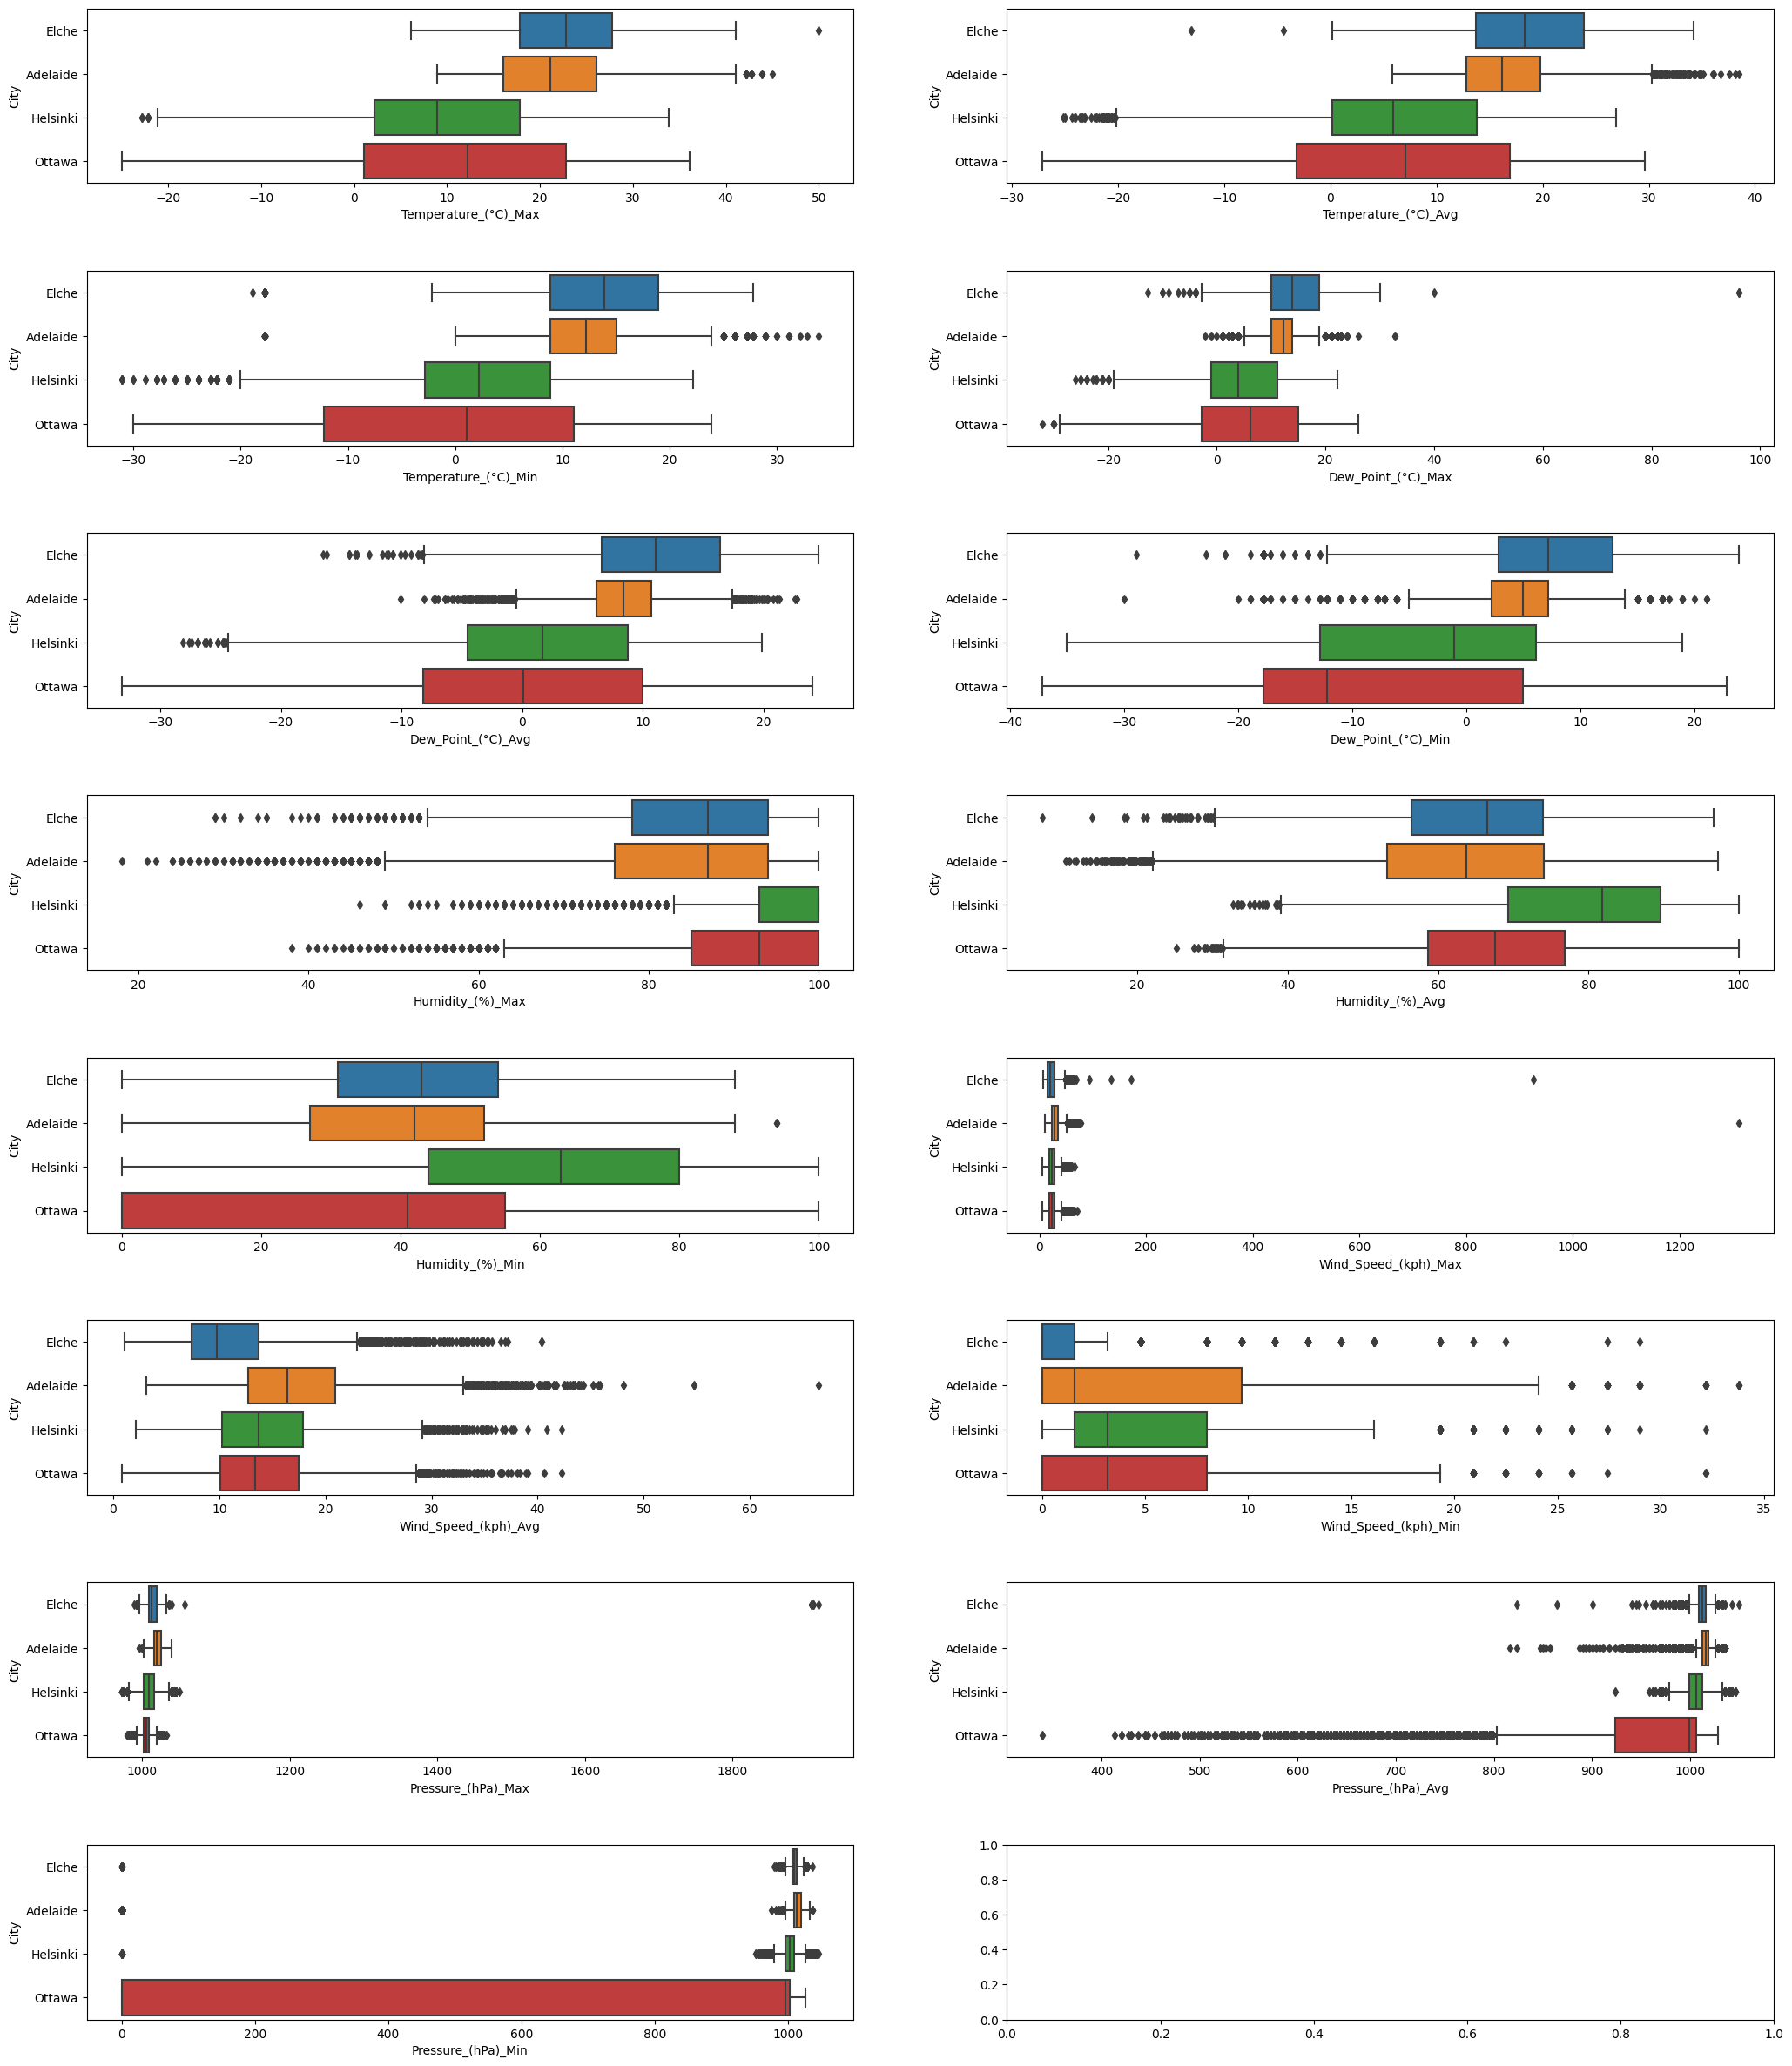

In [56]:
fig, axes = plt.subplots(8,2, figsize = (25,30))
axes = axes.flatten()

fig.subplots_adjust(hspace=0.5, wspace=0.2)

for i, col in enumerate(df_num.columns):
    fig = sns.boxplot(x = col, data = df, y = 'City', ax = axes[i])

In [ ]:
df_elche = df[df['City'] == 'Elche']

df_elche.to_csv('../datos/elche_clima_2002-2022.csv')